In [101]:
import astropy
from astropy.io import fits 
from astropy.table import Table
from astropy.time import Time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.visualization import time_support
import scipy.signal

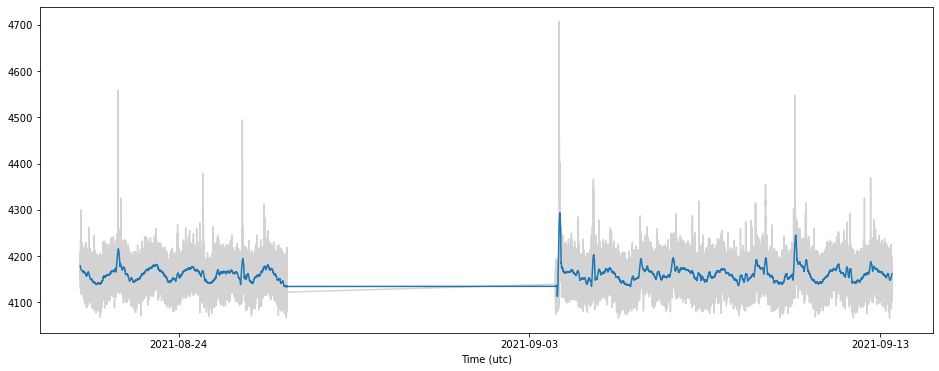

In [104]:
TESSDATA = '/Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'

with fits.open(TESSDATA, mode="readonly") as hdulist:
    raw_time = hdulist[1].data['TIME']
    raw_flux = hdulist[1].data['PDCSAP_FLUX']
    raw_err = hdulist[1].data['PDCSAP_FLUX_ERR']
    
data = np.vstack((raw_time, raw_flux, raw_err))
nonan_data = data[:, ~np.isnan(data).any(axis=0)]

times = nonan_data[0]
flux = nonan_data[1]
error = nonan_data[2]

t_corr = times+2457000
time = Time(t_corr, format = 'jd', scale = 'utc')
time.format = 'iso'

flux = np.array(flux)
err = np.array(error)

time_support()

plt.figure(figsize=(16,6))
flux_smooth = savgol_filter(flux, 500, 3)
plt.plot(time,flux, color='lightgrey')
plt.plot(time,flux_smooth)